# Introduction to OpenCV  

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It is used in image processing and other computer vision tasks. We will learn the basics of OpenCV today followed by a fun project. 

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Reading and Displaying an image

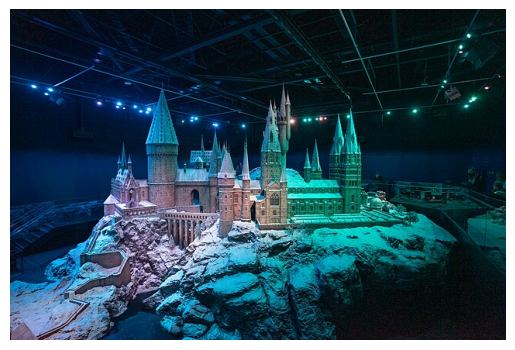

In [67]:
# Read an image from file
img = cv2.imread('./images/hogwarts.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [87]:
# Image as matrix of pixels
print("Image array")
print(img)

# Access pixel values
pixel_value = img[100, 50]  # Get pixel value at (100, 50)
print('Pixel Value:', pixel_value)
img = np.array(img)
print("Shape of image is", img.shape)

Image array
[[[ 37  24  16]
  [ 29  16   8]
  [ 21  10   2]
  ...
  [ 20  22  10]
  [ 17  19   7]
  [ 17  19   7]]

 [[ 15   4   0]
  [ 27  16   8]
  [ 32  21  13]
  ...
  [ 18  20   8]
  [ 16  18   6]
  [ 19  21   9]]

 [[ 14   4   0]
  [ 28  18  11]
  [ 35  25  18]
  ...
  [ 18  20   8]
  [ 19  19   7]
  [ 25  25  13]]

 ...

 [[ 46  26  39]
  [ 93  73  86]
  [137 115 133]
  ...
  [ 33  23  35]
  [ 28  17  27]
  [ 23  12  22]]

 [[ 30  10  23]
  [ 83  62  77]
  [130 108 126]
  ...
  [ 27  19  26]
  [ 25  14  24]
  [ 36  25  33]]

 [[ 19   1  14]
  [ 77  58  73]
  [127 105 123]
  ...
  [ 22  12  18]
  [ 19   8  16]
  [ 36  26  32]]]
Pixel Value: [170  76   0]
Shape of image is (427, 640, 3)


### Convert to Gray Scale

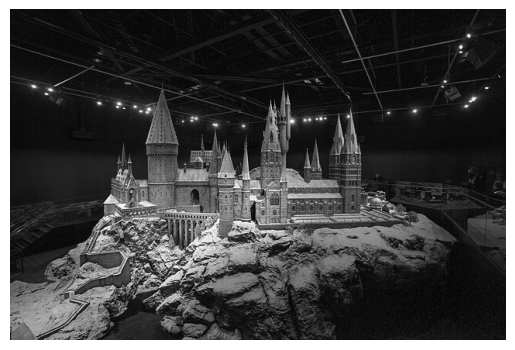

In [86]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))
plt.axis('off')
plt.show()

### Resize an image

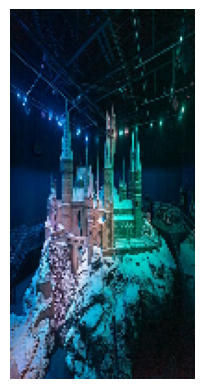

In [70]:
# Resize the image
resized_img = cv2.resize(img, (100, 200))

# Display the image
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Crop an image

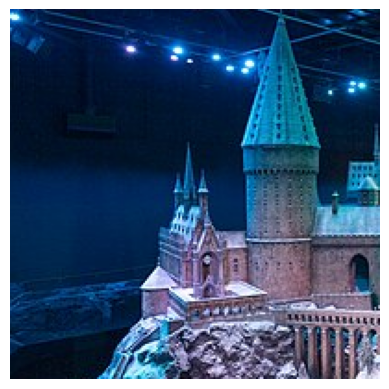

In [71]:
# Crop a region of interest
roi = img[100:300, 50:250]

# Display the image
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Blurring an image

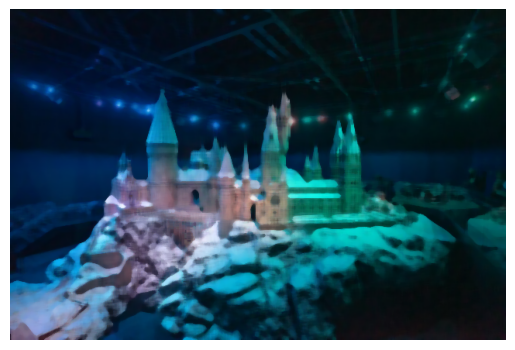

In [72]:
# Apply Median blur
blurred_img = cv2.medianBlur(img, 7, 0) # image, kernel-size

# Display the image
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Arithmetic operations on images

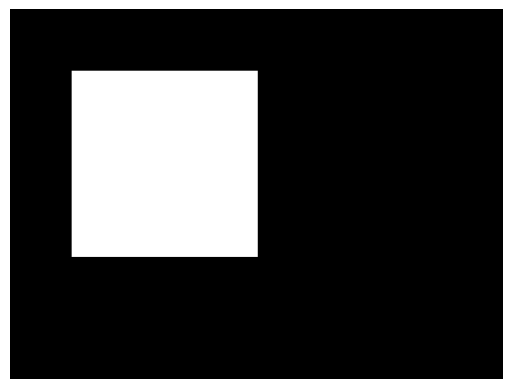

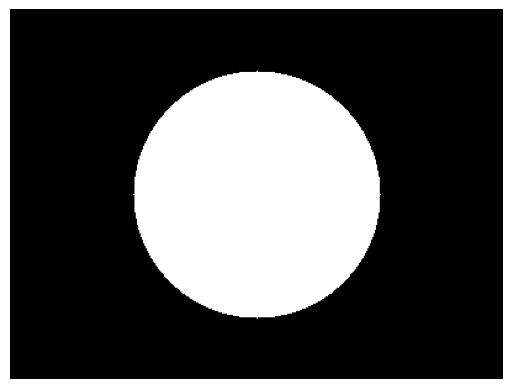

In [73]:
# Create two binary images (black and white) for demonstration
image1 = np.zeros((300, 400), dtype=np.uint8)
image2 = np.zeros((300, 400), dtype=np.uint8)

# Define regions in the images
cv2.rectangle(image1, (50, 50), (200, 200), 255, -1)	# White rectangle in image1
cv2.circle(image2, (200, 150), 100, 255, -1)			# White circle in image2

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

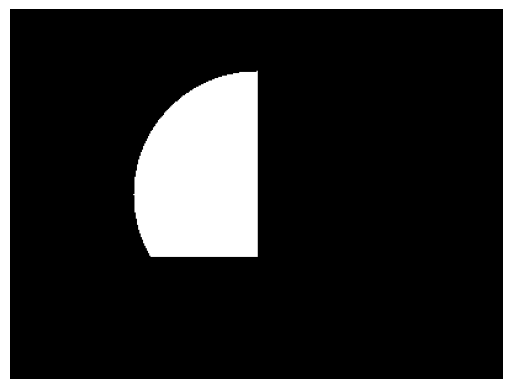

In [74]:
# Bitwise AND operation
bitwise_and = cv2.bitwise_and(image1, image2)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

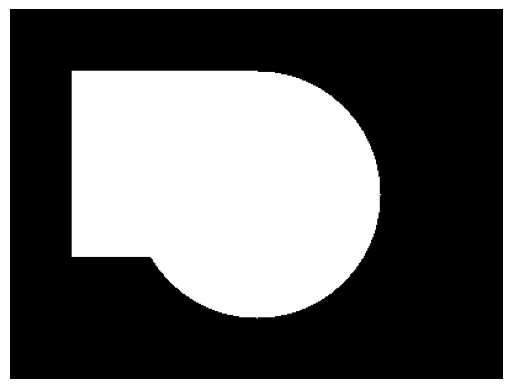

In [75]:
# Bitwise OR operation
bitwise_or = cv2.bitwise_or(image1, image2)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

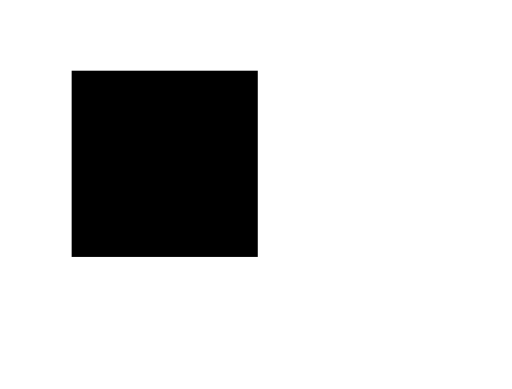

In [76]:
# Bitwise NOT operation
bitwise_not_image1 = cv2.bitwise_not(image1)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_not_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

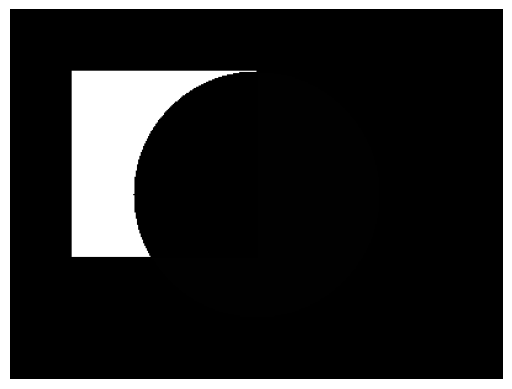

In [77]:
subtraction = image1 - image2

# Display the image
plt.imshow(cv2.cvtColor(subtraction, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Stepwise demonstartion

Tanjiro is in front of a scenic background. He puts the _invisibility cloak_ around himself. Now, let's see what happens.

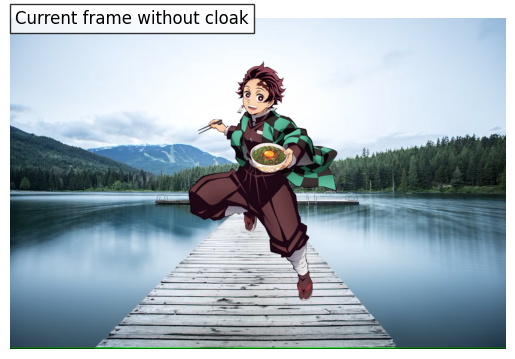

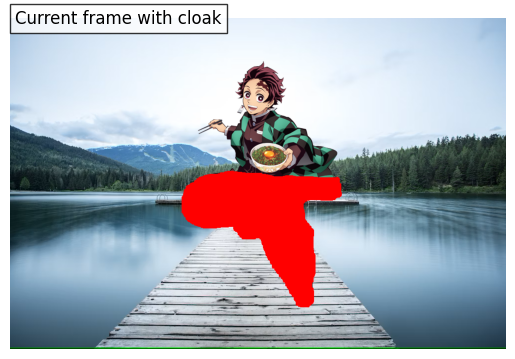

In [89]:
back_img = cv2.imread('./images/background_img.png') # background image
curr_img = cv2.imread('./images/curr_img.png') # current image
clkd_img = cv2.imread('./images/cloaked_img.png') # background image

back_img_rgb = cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB)
curr_img_rgb = cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB)
clkd_img_rgb = cv2.cvtColor(clkd_img, cv2.COLOR_BGR2RGB)

plt.imshow(curr_img_rgb)
plt.axis('off')
plt.text(10, 10, "Current frame without cloak", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

plt.imshow(clkd_img_rgb)
plt.axis('off')
plt.text(10, 10, "Current frame with cloak", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

### Creating the mask for the red cloak

Note that the white region is the region which is supposed to be replaced.

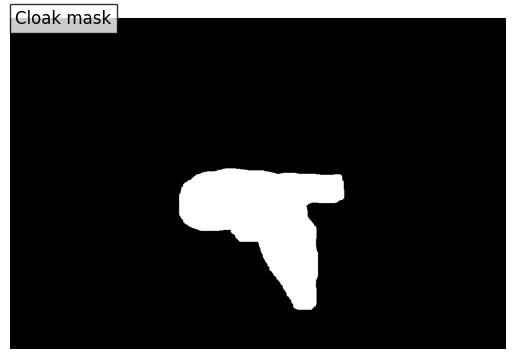

In [79]:
def create_mask(frame, lower_hsv, upper_hsv, kernel_size=3):
	inspect = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
	mask = cv2.inRange(inspect, lower_hsv, upper_hsv)
	mask = cv2.medianBlur(mask, 3)
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	mask = cv2.dilate(mask, kernel, iterations=5)

	return mask

lower_hsv = np.array([0, 250, 250])
upper_hsv = np.array([5, 255, 255])

mask = create_mask(clkd_img_rgb, lower_hsv, upper_hsv)

plt.imshow(mask, cmap="gray")
plt.axis('off')
plt.text(10, 10, "Cloak mask", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()


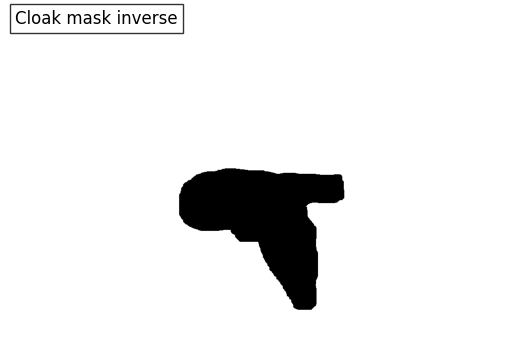

In [80]:
mask_inv = 255 - mask
plt.imshow(mask_inv, cmap="gray")
plt.axis('off')
plt.text(10, 10, "Cloak mask inverse", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

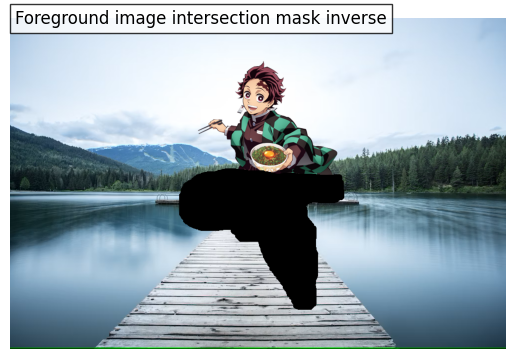

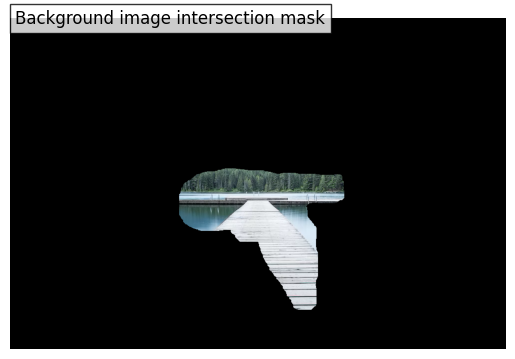

In [81]:
curr_to_remain_rgb = cv2.bitwise_and(curr_img_rgb, curr_img_rgb, mask=mask_inv)
plt.imshow(curr_to_remain_rgb)
plt.axis('off')
plt.text(10, 10, "Foreground image intersection mask inverse", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

to_replace_with_rgb = cv2.bitwise_and(back_img_rgb, back_img_rgb, mask=mask)
plt.text(10, 10, "Background image intersection mask", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.imshow(to_replace_with_rgb)
plt.axis('off')
plt.show()

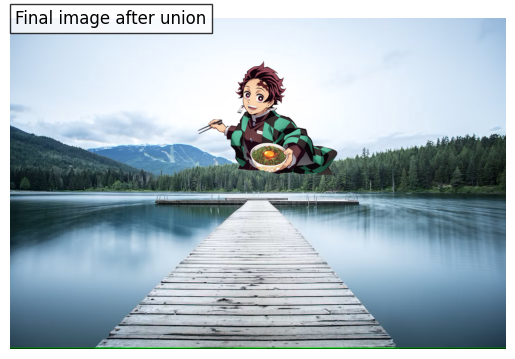

In [82]:
final_rgb = cv2.bitwise_or(curr_to_remain_rgb, to_replace_with_rgb)
plt.imshow(final_rgb)
plt.axis('off')
plt.text(10, 10, "Final image after union", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()